In [1]:
# tabular data manipulation:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import viz
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for hypothesis tests
import scipy.stats as stats

#sklearn metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,RFE, f_regression


In [17]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [18]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


age


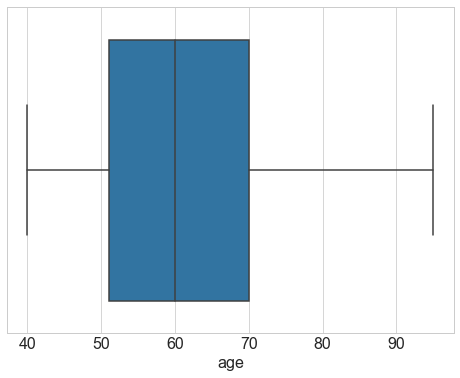

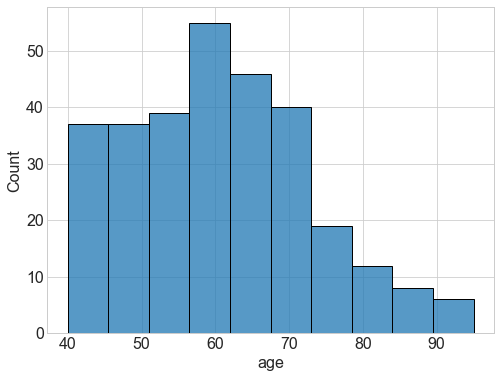


anaemia


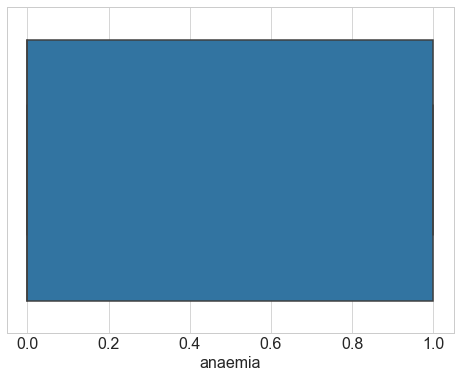

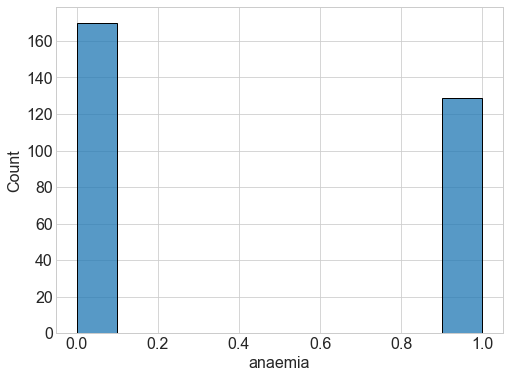


creatinine_phosphokinase


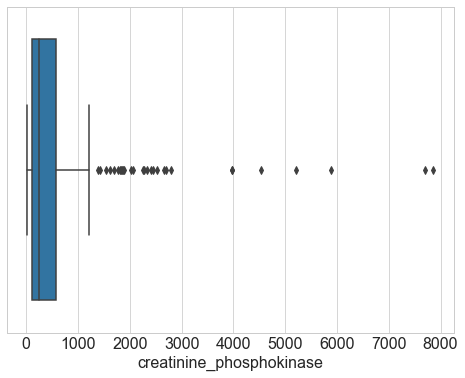

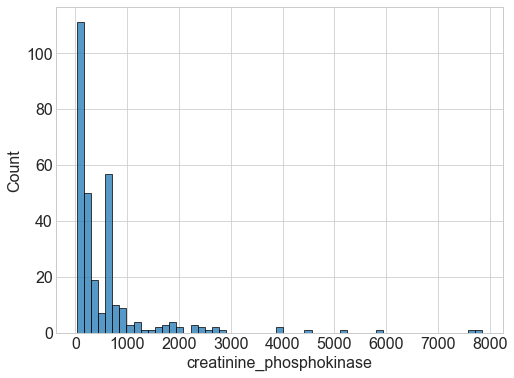


diabetes


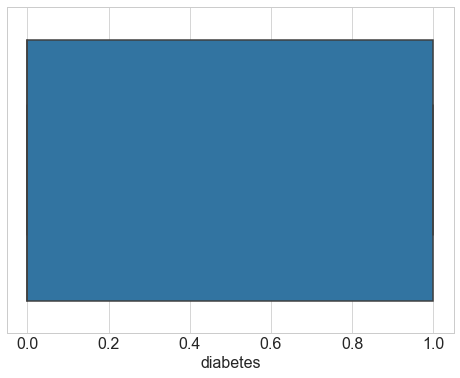

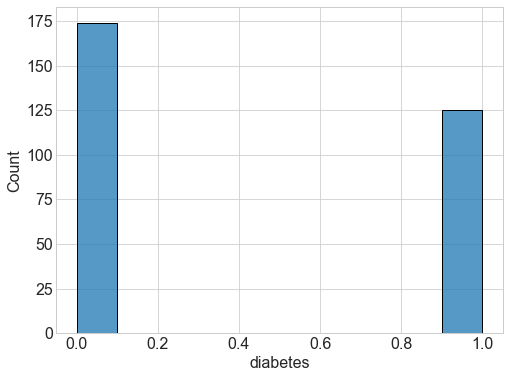


ejection_fraction


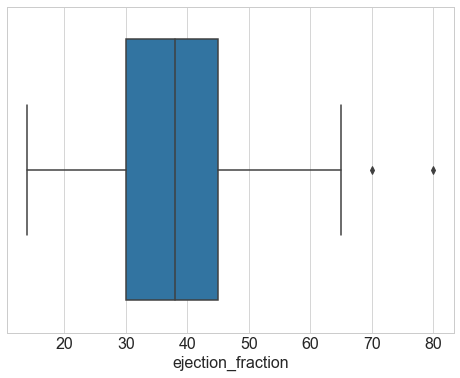

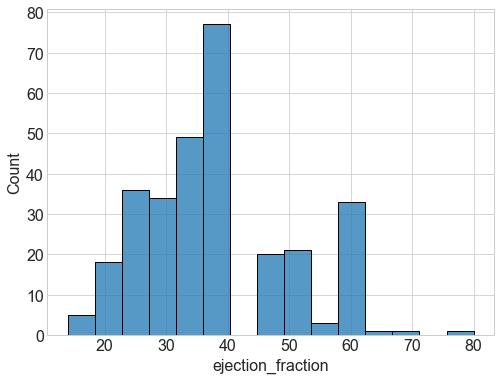


high_blood_pressure


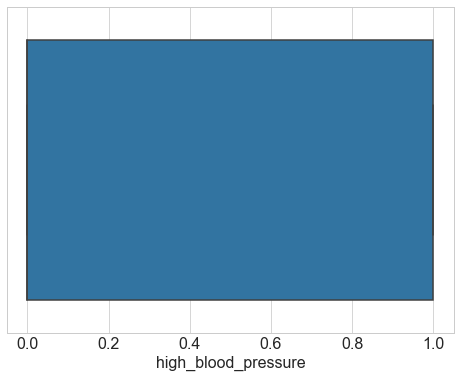

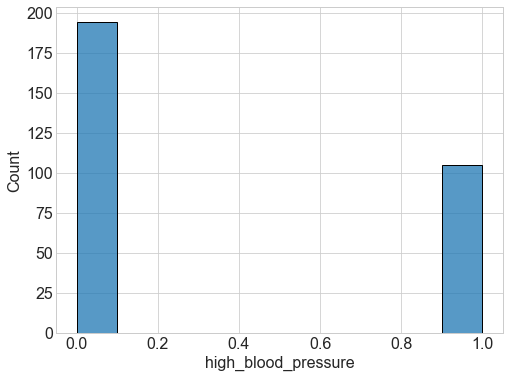


platelets


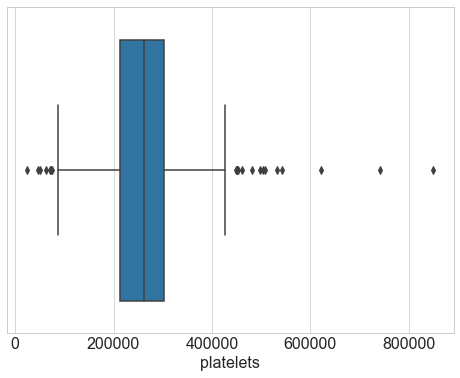

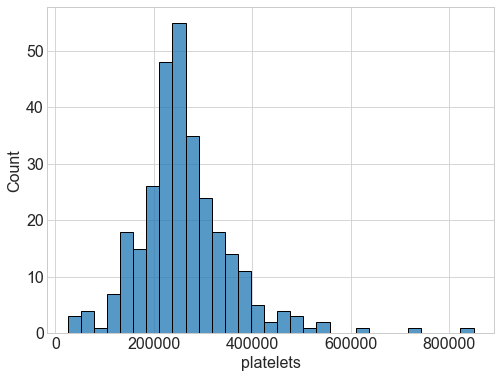


serum_creatinine


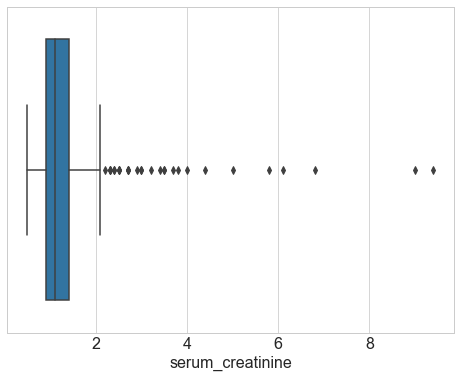

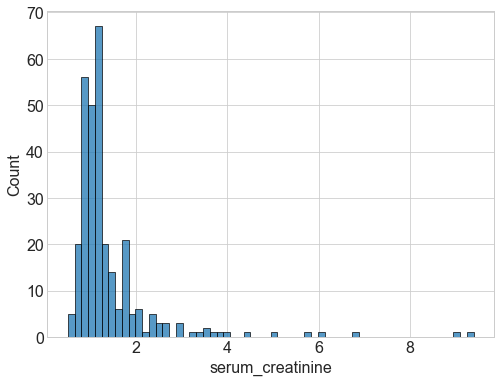


serum_sodium


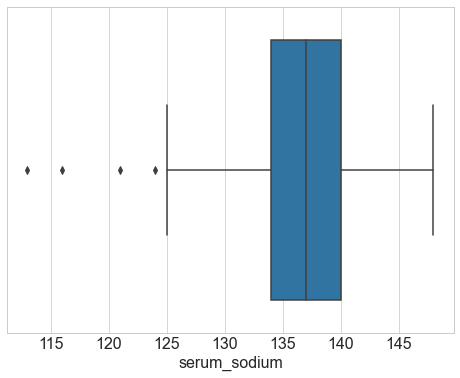

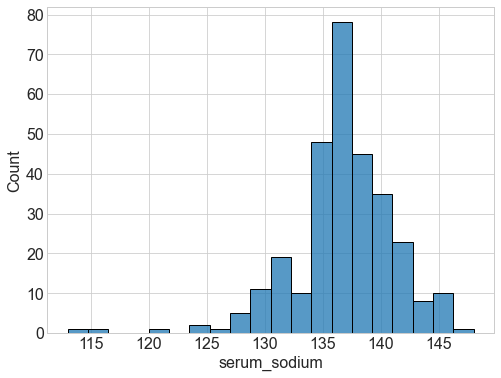


sex


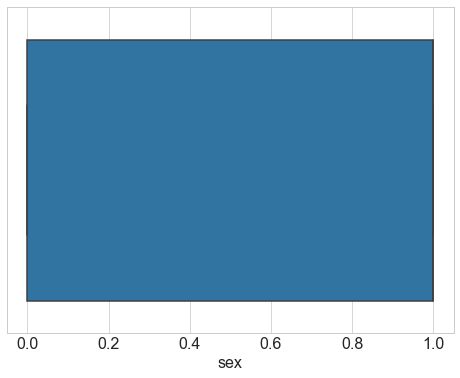

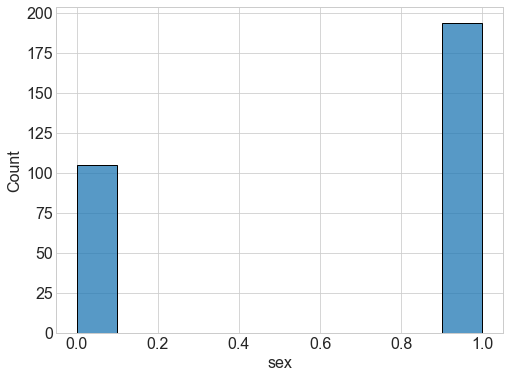


smoking


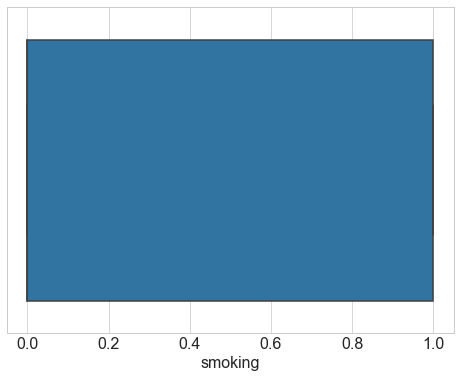

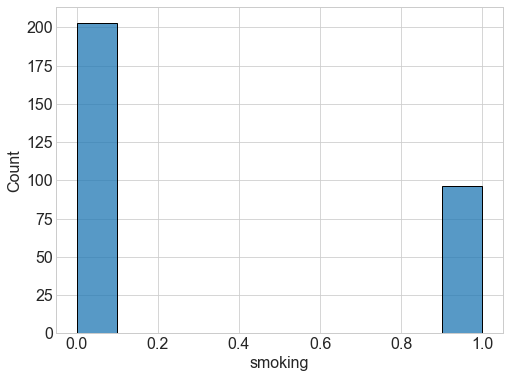


time


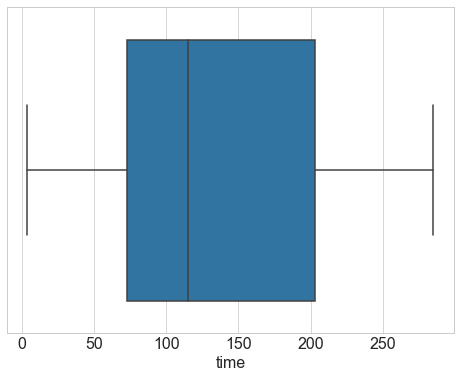

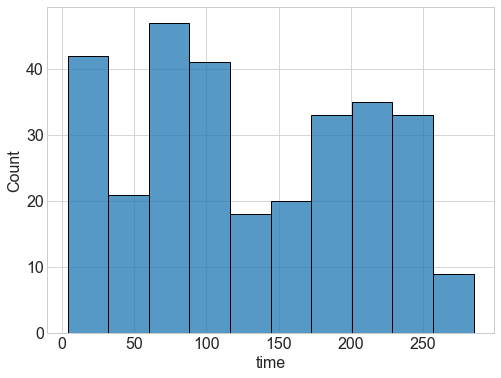


death_event


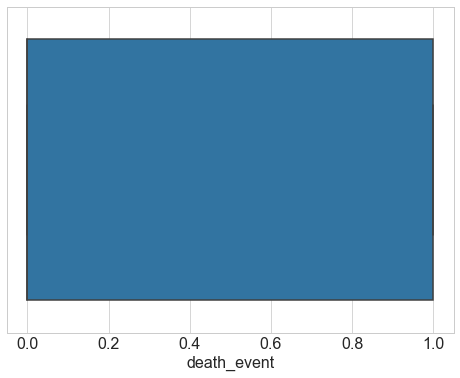

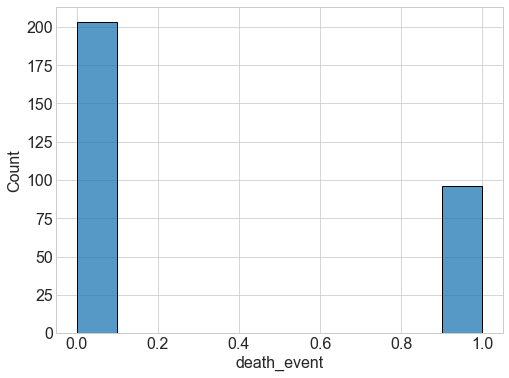

In [19]:
num_col = [col for col in df.columns if col in df.select_dtypes(include = "number")]
for col in num_col:
    print(col)
    #print(df[col].value_counts(ascending = True))
    sns.boxplot(df[col])
    plt.show()
    sns.histplot(df[col])
    plt.show()
    print()

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [6]:
train_val,test = train_test_split(df, test_size = 0.2, stratify = df.death_event, random_state = 123)
train,validate = train_test_split(train_val, test_size = 0.3, stratify = train_val.death_event, random_state = 123)

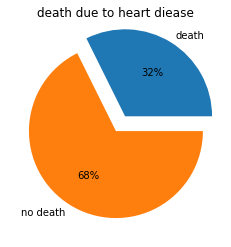

In [13]:
plt.title("death due to heart diease")
labels = ["death", "no death"]
plt.pie([(train.death_event ==1).sum(),(train.death_event ==0).sum()],labels = labels, autopct= '%.0f%%', explode = [0.2,0])
plt.show()

In [14]:
   # 32% death

<AxesSubplot:xlabel='age', ylabel='count'>

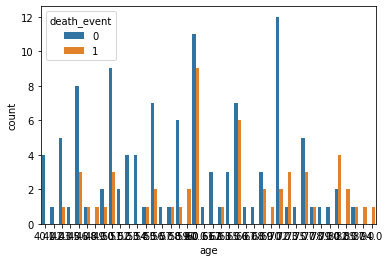

In [15]:
sns.countplot(x= "age", data =train, hue = "death_event")

In [16]:
def run_age_t_test(train):
     null_hyp = 'mean age of people with death event == mean age of people with no death event '
     print("null_hyp:", null_hyp)
     alt_hyp = 'mean age of people with death event != mean age of people with no death event '
     print("alternate_hyp: ", alt_hyp)
     alpha = 0.05
     death_age = train[train.death_event ==1].age
     no_death_age = train[train.death_event == 0].age
     t,p = stats.ttest_ind(death_age, no_death_age )
     if p < alpha:
         print()
         print("reject null hypothesis" )
         print("we conclude ", alt_hyp)
     else:
         print("fail to reject null hypothesis")
         print("we conclude", null_hyp)

In [17]:
run_age_t_test(train)

null_hyp: mean age of people with death event == mean age of people with no death event 
alternate_hyp:  mean age of people with death event != mean age of people with no death event 

reject null hypothesis
we conclude  mean age of people with death event != mean age of people with no death event 


In [18]:
train[train.death_event == 1].age.mean()

64.29629629629629

In [19]:
train[train.death_event == 0].age.mean()

58.545725663716816

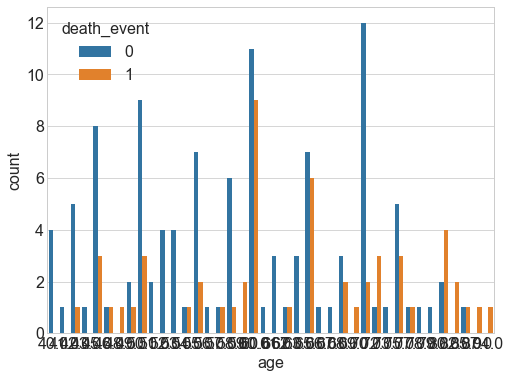

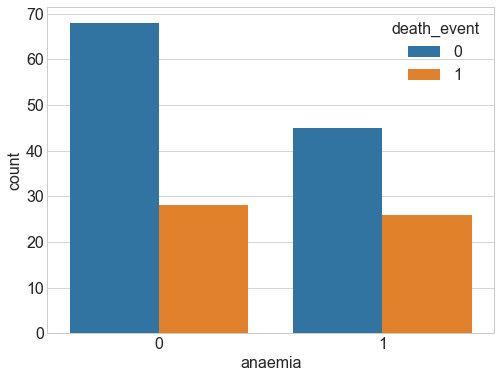

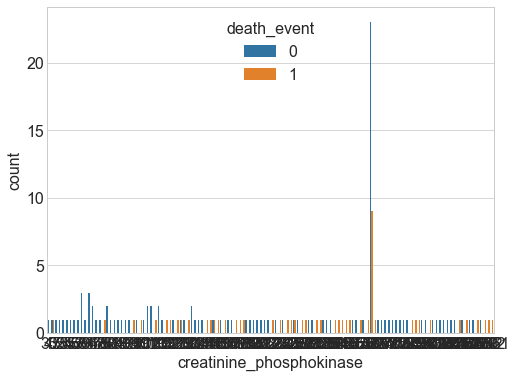

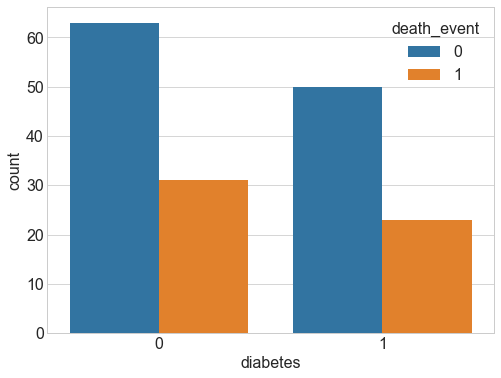

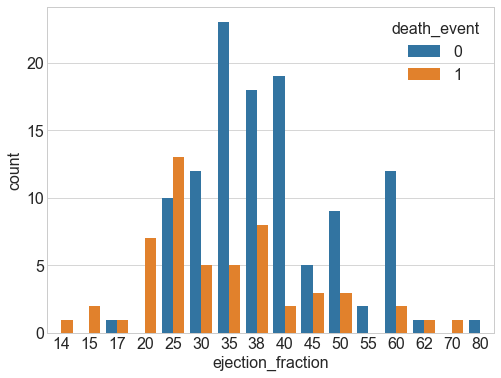

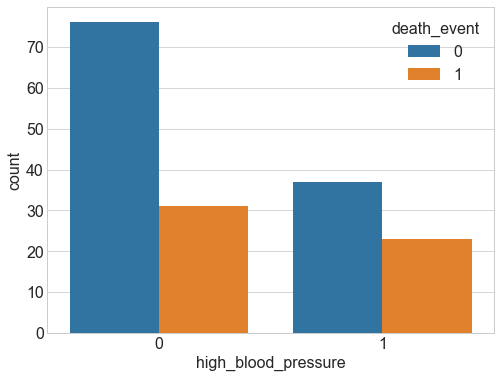

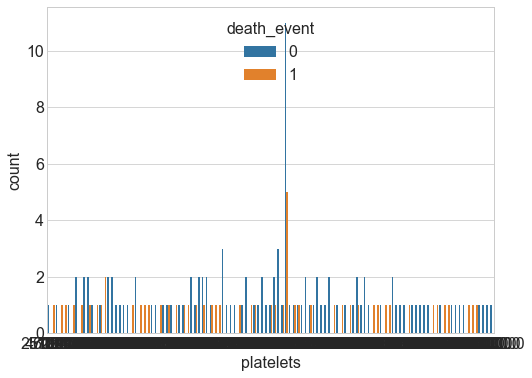

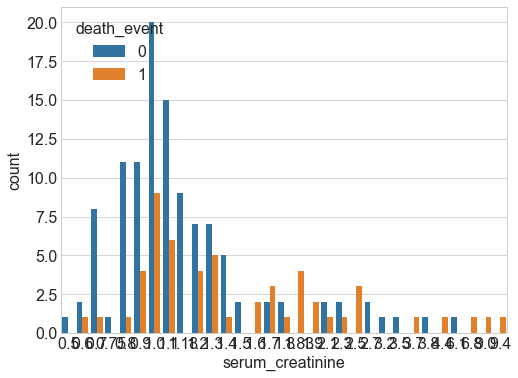

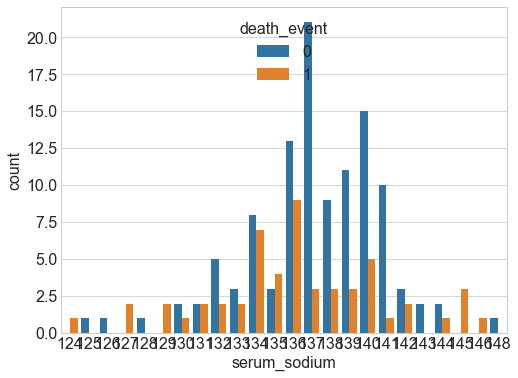

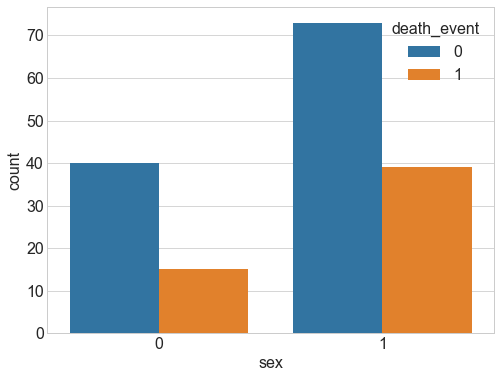

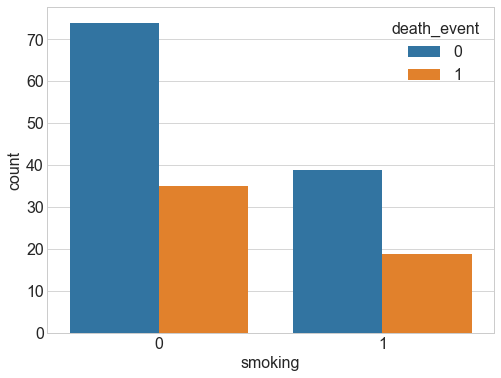

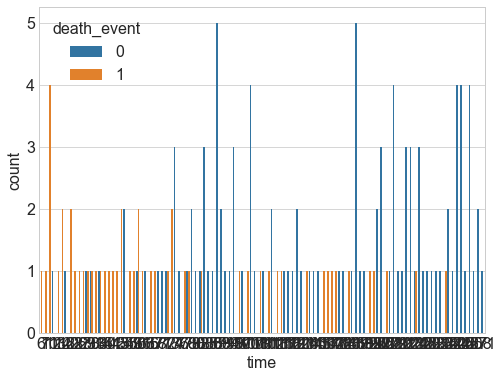

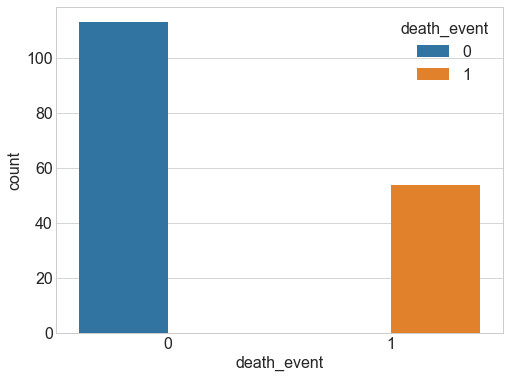

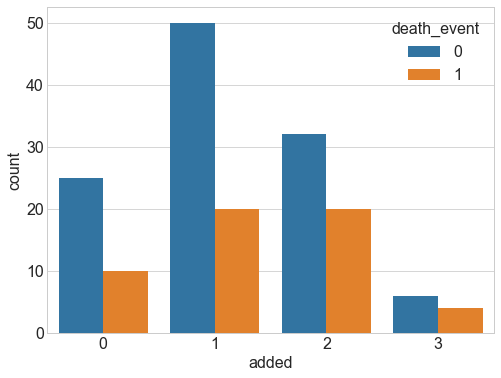

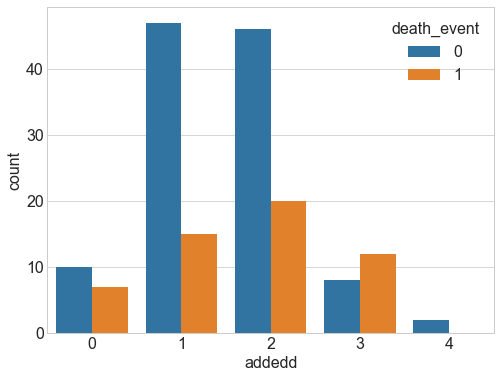

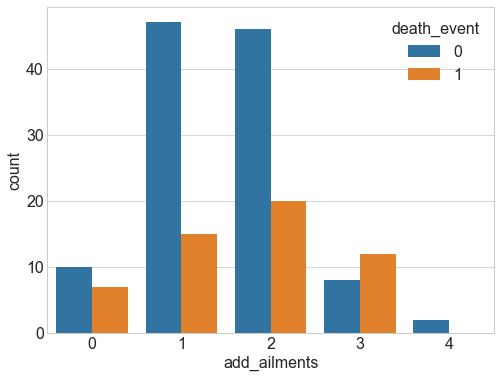

In [92]:
for col in train.columns:
    sns.countplot(x = train[col], hue = train.death_event)
    plt.show()
    

[]

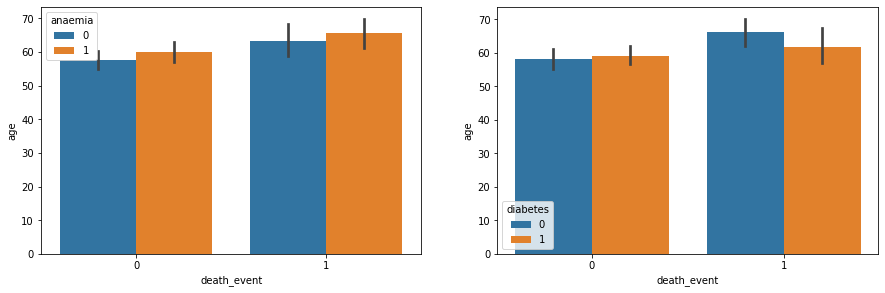

In [21]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(train['death_event'], train['age'],hue=train['anaemia'])
plt.subplot(2,2,2)
sns.barplot(train['death_event'], train['age'],hue=train['diabetes'])
plt.plot()


In [22]:

col = ["creatinine_phosphokinase", 'ejection_fraction', 'platelets', "serum_creatinine","serum_sodium", "time"]

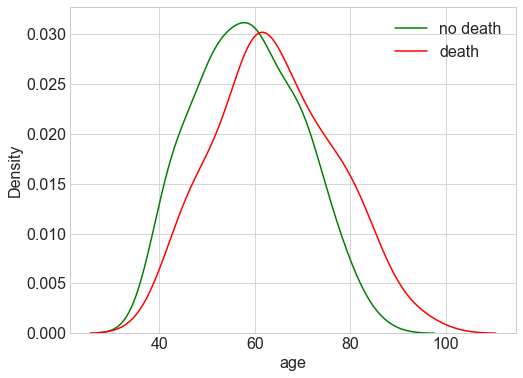

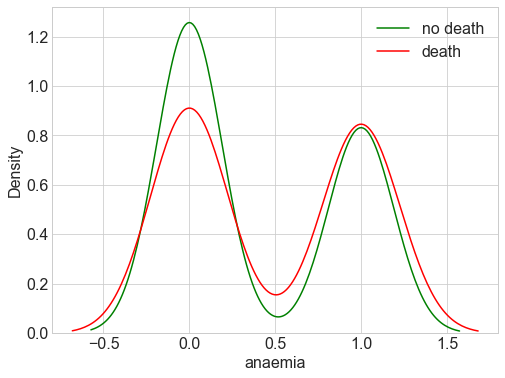

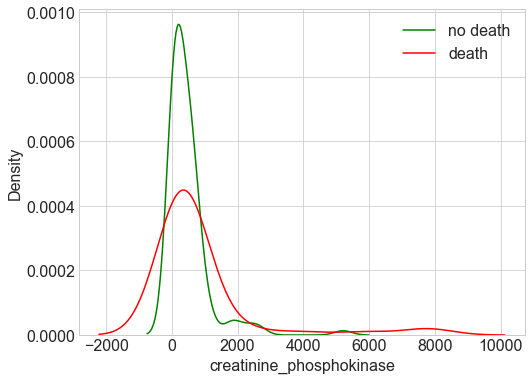

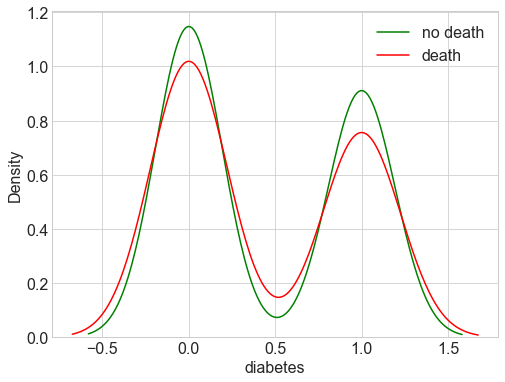

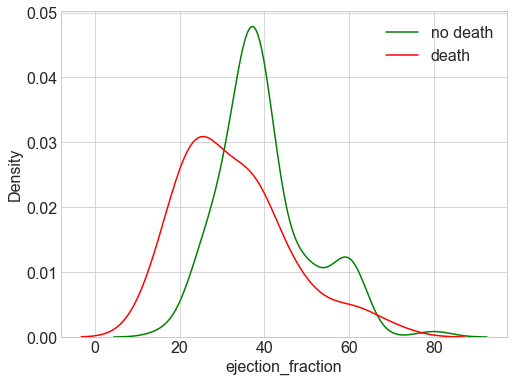

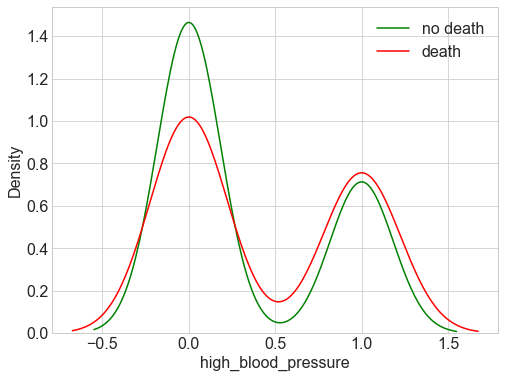

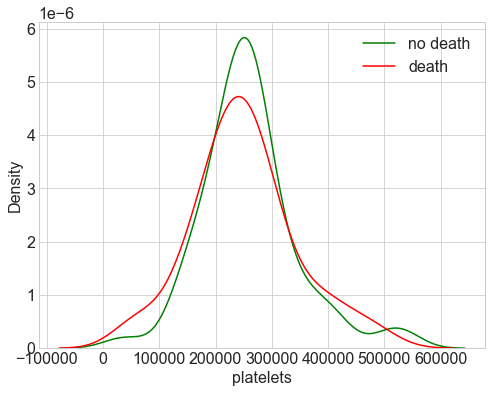

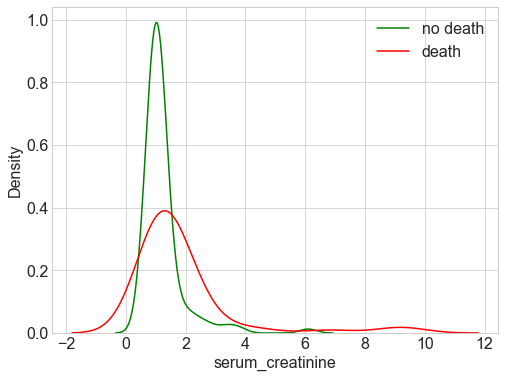

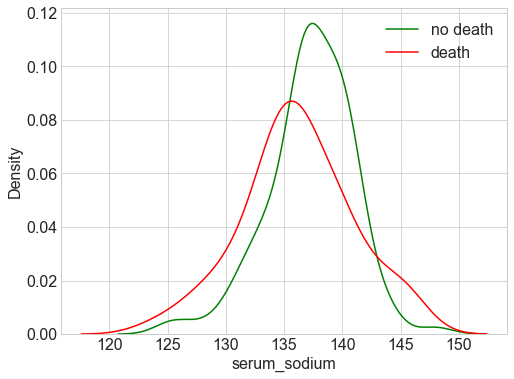

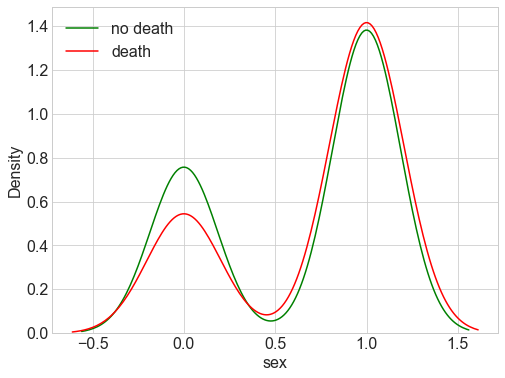

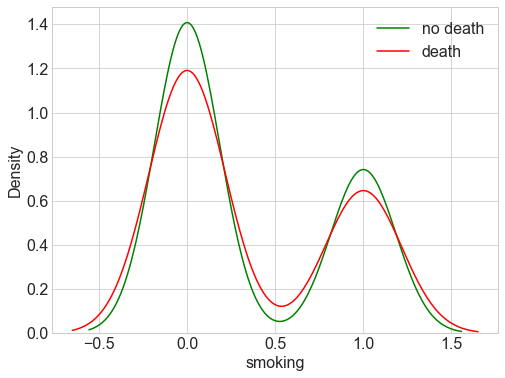

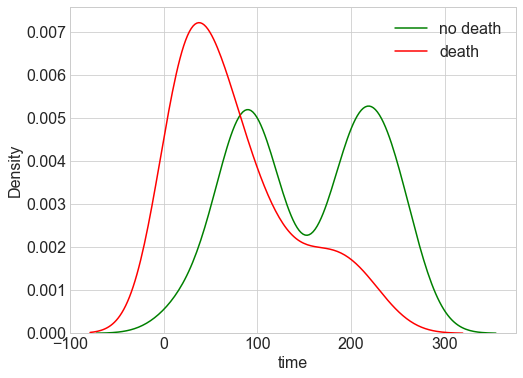

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


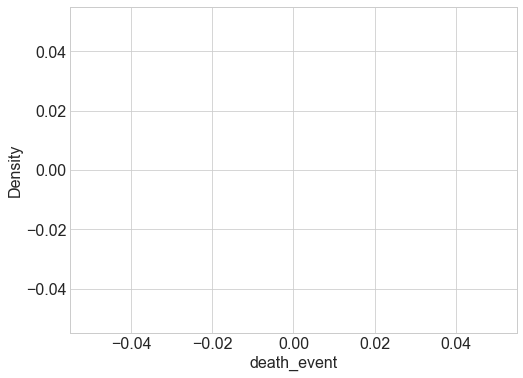

In [40]:
for col in train.columns:
    sns.distplot(train[train.death_event == 0][col],hist = False, color = 'green', label = "no death")
    sns.distplot(train[train.death_event == 1][col], hist = False, color = "red", label = "death")
    plt.legend()
    plt.show()

In [24]:
#for col in train[['creatinine_phosphokinase',"serum_creatinine"]]:
def plot_creatinine(train):
    plt.figure(figsize = (16,15))
    plt.subplot(221)
    plt.title("enzyme creatinine_phosphokinase vs death event")
    sns.distplot(train[train.death_event == 0].creatinine_phosphokinase,hist = False, color = 'green', label = "no death")
    sns.distplot(train[train.death_event == 1].creatinine_phosphokinase, hist = False, color = "red", label = "death")
    plt.legend()


    plt.subplot(222)
    plt.title("serum creatinine vs death event")
    sns.distplot(train[train.death_event == 0].serum_creatinine,hist = False, color = 'green', label = "no death")
    sns.distplot(train[train.death_event == 1].serum_creatinine, hist = False, color = "red", label = "death")
    plt.legend()
    plt.show()

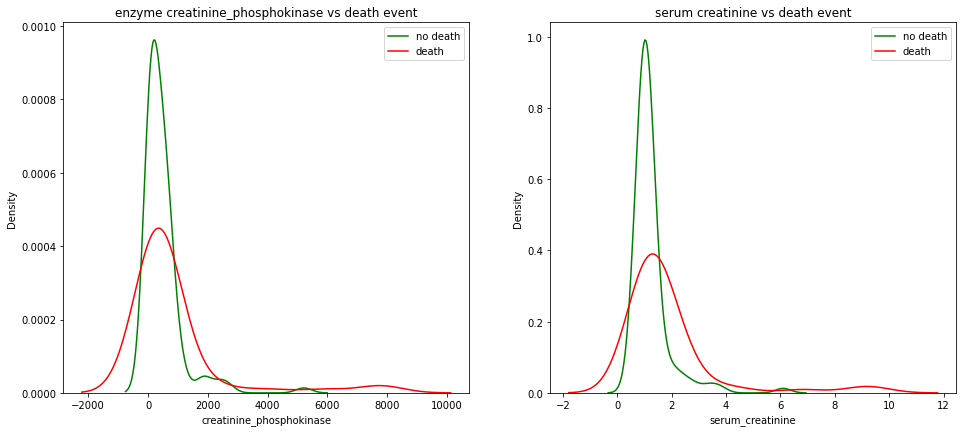

In [25]:
plot_creatinine(train)

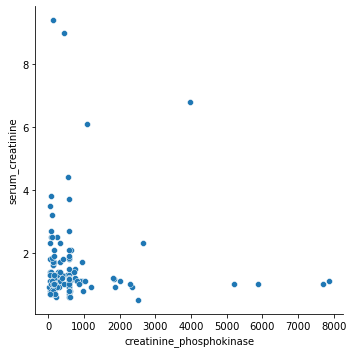

In [26]:
sns.relplot(x = "creatinine_phosphokinase", y = "serum_creatinine", data = train)

In [27]:
df.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


In [38]:
def plot_age_vs_time(train):
    sns.scatterplot(y='age', x='time', hue ='death_event', data = train)
    plt.title("age, time vs death event")

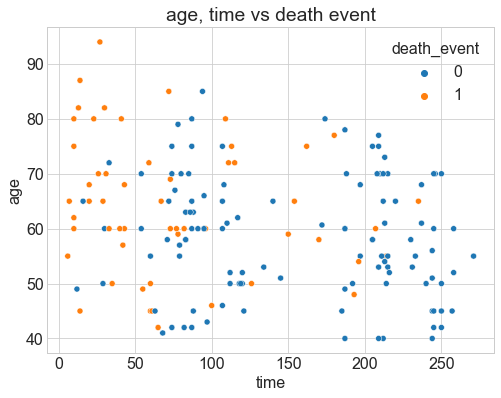

In [39]:
plot_age_vs_time(train)

Text(0.5, 1.0, '')

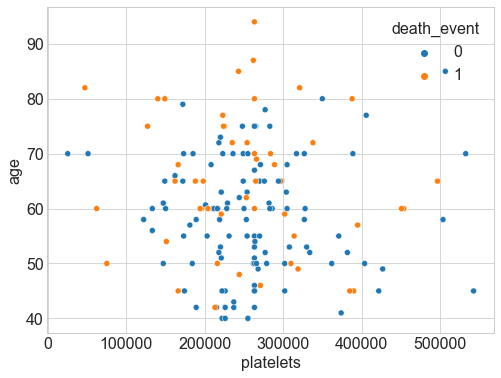

In [35]:
sns.scatterplot(y='age', x='platelets', hue ='death_event', data = train)

In [66]:
def plot_ejection_fraction_vs_sex(train):
    sns.swarmplot(x = "sex", y = "ejection_fraction", hue = "death_event", data = train)
    plt.xticks([0,1],["female", "male"])
    plt.title("ejection fraction vs sex")
    plt.show()

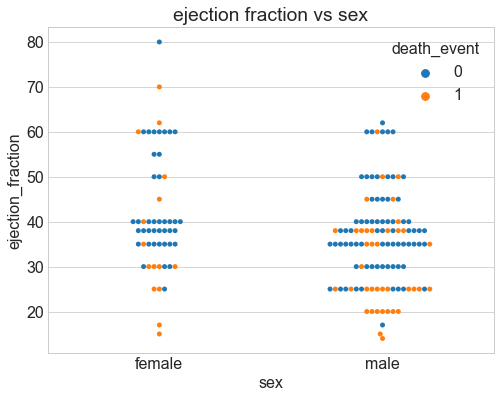

In [67]:
 plot_ejection_fraction_vs_sex(train)

In [34]:
#col = ["creatinine_phosphokinase", 'ejection_fraction', 'platelets', "serum_creatinine","serum_sodium", "time"]
#sns.pairplot(train, corner = True, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
#plt.plot()

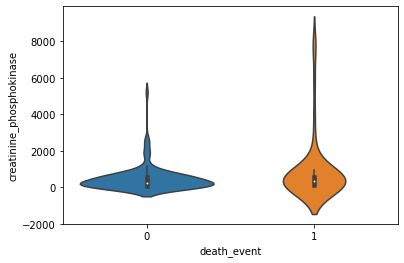

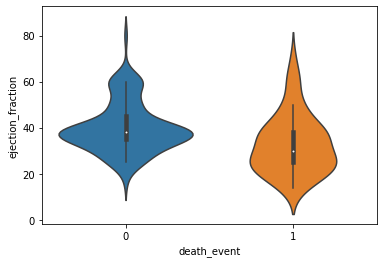

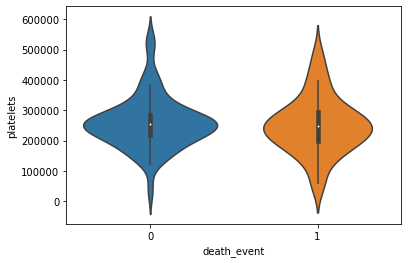

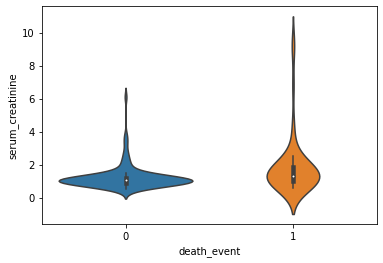

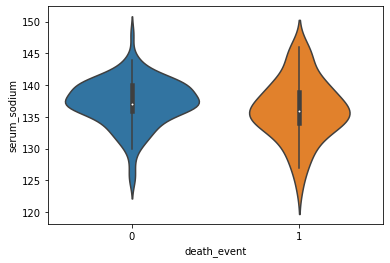

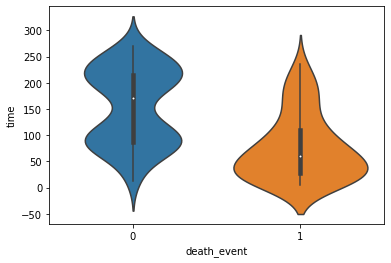

In [29]:
col = ["creatinine_phosphokinase", 'ejection_fraction', 'platelets', "serum_creatinine","serum_sodium", "time"]

for co in col:
    sns.violinplot(y = train[co], x= "death_event", data = train)
    plt.show()

In [16]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
27,70.0,0,122,1,45,1,284000.0,1.3,136,1,1,26,1
211,50.0,0,582,0,62,1,147000.0,0.8,140,1,1,192,0
226,58.0,1,57,0,25,0,189000.0,1.3,132,1,1,205,0
100,65.0,1,305,0,25,0,298000.0,1.1,141,1,0,87,0
225,75.0,0,675,1,60,0,265000.0,1.4,125,0,0,205,0


In [74]:
train["add_ailments"] = (train[["anaemia","diabetes","high_blood_pressure", "smoking"]]==1).sum(axis =1)


In [90]:
def plot_add_ailments(train):
    sns.histplot(x = "add_ailments", data = train, hue = "death_event", multiple="stack" , kde = True)
    plt.title("aliments vs death events")
    plt.show()

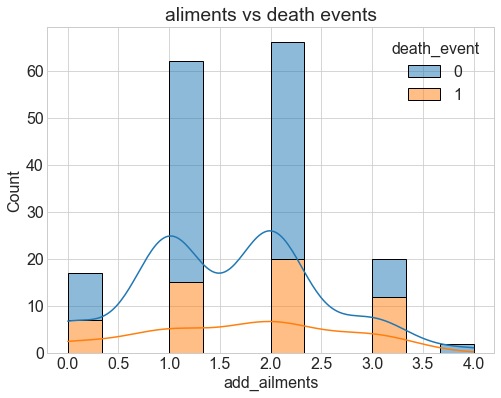

In [91]:
plot_add_ailments(train)

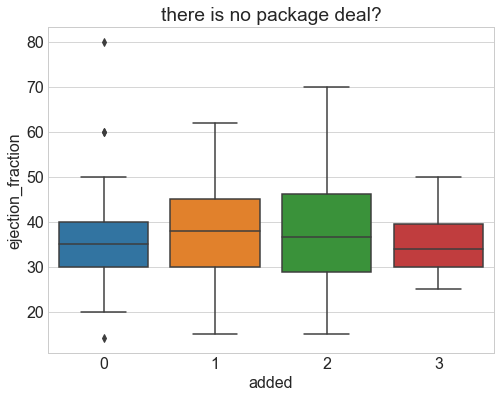

In [77]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "added", data = train, y = "ejection_fraction" )
plt.title("there is no package deal?")
plt.show()

In [34]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,added
27,70.0,0,122,1,45,1,284000.0,1.3,136,1,1,26,1,2
211,50.0,0,582,0,62,1,147000.0,0.8,140,1,1,192,0,1
226,58.0,1,57,0,25,0,189000.0,1.3,132,1,1,205,0,1
100,65.0,1,305,0,25,0,298000.0,1.1,141,1,0,87,0,1
225,75.0,0,675,1,60,0,265000.0,1.4,125,0,0,205,0,1


### Modeling

In [7]:
X = train.drop(columns = ["death_event"])
y = train.death_event

In [8]:
def select_kbest(X,y,k=4):
    X = train.drop(columns = ["death_event"])
    y = train.death_event
    #make the thing
    kbest = SelectKBest(f_regression, k=k)
    #fit the thing
    kbest.fit(X,y)
    features = X.columns[kbest.get_support()]
    return features

In [9]:
select_kbest(X,y, k = 4)

Index(['age', 'ejection_fraction', 'serum_creatinine', 'time'], dtype='object')

In [16]:
def select_rfe(X,y,  n_features_to_select = 4):
    #create the model
    rfe=RFE(LinearRegression(), n_features_to_select = n_features_to_select) 
    #fit the model
    rfe.fit(X,y)
    #use get_support()
    return X.columns[rfe.get_support()]

In [68]:
select_rfe(X,y, n_features_to_select = 4)


Index(['diabetes', 'high_blood_pressure', 'serum_creatinine', 'sex', 'added'], dtype='object')

In [69]:
train.corr()[["death_event"]].sort_values(by = "death_event", ascending = False)

,death_event
death_event,1.000000
serum_creatinine,0.246677
age,0.232900
creatinine_phosphokinase,0.164589
high_blood_pressure,0.096022
added,0.091612
anaemia,0.078770
sex,0.075845
smoking,0.006601
diabetes,-0.015608


In [10]:
features = select_kbest(X,y,k=4)
columns = features

In [11]:
# we need to scale them before fitting them to model

scaled_train,scaled_validate,scaled_test = viz.scale_data(train,validate,test,columns)

In [13]:
scaled_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,age_scaled,ejection_fraction_scaled,serum_creatinine_scaled,time_scaled
0,70.0,0,122,1,45,1,284000.0,1.3,136,1,1,26,1,0.555556,0.469697,0.089888,0.075472
1,50.0,0,582,0,62,1,147000.0,0.8,140,1,1,192,0,0.185185,0.727273,0.033708,0.701887
2,58.0,1,57,0,25,0,189000.0,1.3,132,1,1,205,0,0.333333,0.166667,0.089888,0.750943
3,65.0,1,305,0,25,0,298000.0,1.1,141,1,0,87,0,0.462963,0.166667,0.067416,0.305660
4,75.0,0,675,1,60,0,265000.0,1.4,125,0,0,205,0,0.648148,0.696970,0.101124,0.750943


In [15]:
features = ["age_scaled","ejection_fraction_scaled","serum_creatinine_scaled","time_scaled"]

In [20]:
#set up X and y
X_train = train[features]
y_train = train.death_event
X_validate = validate[features]
y_validate = validate.death_event
X_test = test[features]
y_test = test.death_event

In [21]:
X_train.head()

,age,ejection_fraction,serum_creatinine,time
27,70.0,45,1.3,26
211,50.0,62,0.8,192
226,58.0,25,1.3,205
100,65.0,25,1.1,87
225,75.0,60,1.4,205


In [14]:
def get_baseline(y_train):
    print(y_train.value_counts())
    print()
    baseline_accuracy = (y_train == 0).mean()
    print('baseline accuracy is:', round(baseline_accuracy,4))

In [15]:
get_baseline(y_train)

0    113
1     54
Name: death_event, dtype: int64

baseline accuracy is: 0.6766


Mode1 : DT

In [16]:
model_scores = []
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i, random_state =123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"i":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,i,accuracy_train,accuracy_validate,difference
0,1,0.808383,0.902778,-0.094395
1,2,0.808383,0.902778,-0.094395
2,3,0.850299,0.875000,-0.024701
3,4,0.898204,0.791667,0.106537
4,5,0.922156,0.805556,0.116600
5,6,0.934132,0.819444,0.114687
6,7,0.976048,0.777778,0.198270
7,8,0.988024,0.819444,0.168580
8,9,1.000000,0.819444,0.180556
9,10,1.000000,0.819444,0.180556


model 2: random forest

In [17]:
for i in range(1,15):

    model = RandomForestClassifier(min_samples_leaf= i,random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"min_sample_leaf":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df


,i,accuracy_train,accuracy_validate,difference,min_sample_leaf
0,1.0,0.808383,0.902778,-0.094395,NaN
1,2.0,0.808383,0.902778,-0.094395,NaN
2,3.0,0.850299,0.875000,-0.024701,NaN
3,4.0,0.898204,0.791667,0.106537,NaN
4,5.0,0.922156,0.805556,0.116600,NaN
5,6.0,0.934132,0.819444,0.114687,NaN
6,7.0,0.976048,0.777778,0.198270,NaN
7,8.0,0.988024,0.819444,0.168580,NaN
8,9.0,1.000000,0.819444,0.180556,NaN
9,10.0,1.000000,0.819444,0.180556,NaN


model3:knn 


In [18]:
empty_model = []
for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors = k)
    model=model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"k":k, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    
    
    empty_model.append(output)

df = pd.DataFrame(empty_model)
df

,k,accuracy_train,accuracy_validate,difference
0,1,1.000000,0.833333,0.166667
1,2,0.874251,0.791667,0.082585
2,3,0.886228,0.833333,0.052894
3,4,0.868263,0.805556,0.062708
4,5,0.856287,0.861111,-0.004824
5,6,0.874251,0.847222,0.027029
6,7,0.844311,0.861111,-0.016800
7,8,0.838323,0.875000,-0.036677
8,9,0.838323,0.888889,-0.050566


In [77]:

# make the thing 
logit = LogisticRegression() 
# fit the thing
logit.fit(X_train, y_train)
# use the thing
pred = logit.predict(X_train)
accuracy_train = model.score(X_train,y_train)
accuracy_validate = model.score(X_validate,y_validate)
difference = accuracy_train-accuracy_validate
output= { "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
output


{'accuracy_train': 0.8083832335329342,
 'accuracy_validate': 0.7361111111111112,
 'difference': 0.07227212242182302}

In [ ]:
KNN seems to be the best model